# Práctica 2: *Othello* (*reversi*)
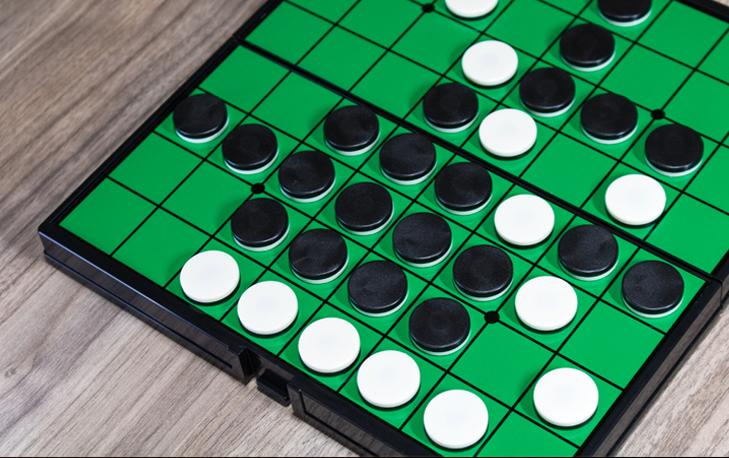


Realizada por:
- Diego Esclarín Fernández
- José Walter Hernández Pérez
- Daniel del Nuevo Montero

## Importamos los módulos necesarios

In [ ]:
import numpy as np
import copy

## Características del juego
1. **Estrategia y Pensamiento Táctico**: Othello es un juego que requiere habilidades estratégicas y pensamiento táctico. Los jugadores deben anticipar los movimientos del oponente y planificar sus propias jugadas para obtener una ventaja en el tablero.

2. **Simplicidad de las Reglas**: A pesar de su profundidad estratégica, las reglas de Othello son simples y fáciles de entender, lo que lo hace accesible para jugadores de todas las edades y niveles de habilidad.

3. **Juego para 2 Jugadores**: Othello se juega entre dos jugadores, lo que lo convierte en un juego ideal para enfrentamientos uno a uno.

4. **Tablero y fichas**: El tablero de Othello tiene un tamaño de 8x8 cuadrados, y cada jugador tiene un conjunto de fichas del mismo color, generalmente blanco y negro, aunque pueden ser de diferentes colores según la preferencia.

5. **Reversión de fichas**: Una característica única de Othello es la capacidad de revertir las fichas del oponente al colocar una ficha propia en el tablero, lo que agrega una dimensión estratégica adicional al juego.

## Reglas del juego:
1. **Inicio del juego**: El juego comienza con cuatro fichas colocadas en el centro del tablero en un patrón específico: dos fichas blancas y dos negras, colocadas en forma alternada, formando una disposición en forma de X.

2. **Turnos de juego**: Los jugadores alternan turnos para colocar una ficha de su color en el tablero. En su turno, un jugador debe colocar una ficha en un espacio vacío del tablero de tal manera que al menos una ficha del oponente esté atrapada entre la ficha recién colocada y otra ficha del mismo color del jugador. Si no es posible colocar una ficha sin atrapar alguna del contrario se pierde el turno.

3. **Reversión de fichas**: Todas las fichas del oponente que quedan atrapadas entre la ficha recién colocada y otra ficha del mismo color del jugador se voltean para convertirse en fichas del jugador que realizó el movimiento.

4. **Final del juego**: El juego continúa hasta que ningún jugador puede realizar un movimiento válido. Esto ocurre cuando el tablero está lleno o cuando ninguno de los jugadores puede colocar una ficha que capture fichas del oponente.

5. **Conteo de fichas**: Una vez que el juego ha terminado, se cuentan las fichas de cada jugador en el tablero. El jugador con más fichas de su color es declarado ganador.

## Heurísticas

### Heurística 1
1. **Control del borde y de las esquinas**: En las etapas iniciales del juego, el control del borde y las esquinas es crucial ya que proporciona una base sólida para expandir tu presencia en el tablero y limita las opciones del oponente. Por lo tanto, podría considerarse una prioridad alta asegurar estas áreas clave.

2. **Movimientos de captura múltiple**: Los movimientos que permiten capturar múltiples fichas del oponente en una sola jugada pueden tener un impacto significativo en el juego al aumentar tu número de fichas y disminuir las opciones del oponente. Por lo tanto, también podría considerarse una prioridad alta identificar y ejecutar movimientos de captura múltiple cuando sea posible.

3. **Estabilidad de las fichas**: Colocar fichas en posiciones estables que sean difíciles de voltear por el oponente es importante para mantener una ventaja en el tablero a lo largo del juego. Aunque esta consideración es importante en todas las etapas del juego, su importancia puede variar según la situación específica.

4. **Evaluar el impacto a largo plazo**: Considerar cómo afectarán tus movimientos la configuración del tablero en las próximas jugadas es esencial para desarrollar una estrategia sólida. Aunque esta consideración es importante en todas las etapas del juego, puede ser especialmente relevante en las etapas intermedias y tardías cuando las posiciones se vuelven más complicadas.

5. **Control del centro del tablero**: Asegurar el control del centro del tablero puede proporcionar una posición más fuerte y permitirte moverte más fácilmente a diferentes partes del tablero. Aunque esto puede ser importante en todas las etapas del juego, su prioridad puede ser menor en comparación con otros puntos en las etapas iniciales cuando el control del borde y las esquinas son más críticos.

### Heurística 2
1. **Movimientos válidos**: Otorga un valor mayor si el jugador tiene más movimientos válidos disponibles en comparación con el oponente.

2. **Control del tablero**: Evalúa cuántas fichas tiene el jugador en comparación con el oponente. Tener más fichas generalmente significa tener una mejor posición en el tablero.

3. **Estabilidad de las fichas**: Evalúa cuántas fichas tienen menos posibilidades de ser volteadas por el oponente en el futuro. Las fichas en las esquinas y en los bordes del tablero suelen ser más estables.

4. **Movimientos de captura**: Evalúa la capacidad del jugador para realizar movimientos que le permitan capturar múltiples fichas del oponente en una sola jugada.

5. **Control de las esquinas y bordes**: Otorga un valor mayor a las fichas del jugador que ocupan las esquinas y los bordes del tablero, ya que son posiciones estratégicas.

6. **Movimientos a largo plazo**: Evalúa cómo los movimientos actuales pueden afectar la posición del tablero en las jugadas futuras.

## Función de evaluación

Esta función evalúa la posición actual del tablero para un jugador específico (especificado por `player_color`). Utiliza las ponderaciones para cada característica para calcular un valor de evaluación basado en la cantidad de fichas, la movilidad, el control de las esquinas y el control de los bordes. Puedes ajustar las ponderaciones según tus preferencias o experimentar con otras características para mejorar la precisión de la función de evaluación. Además, asumo que tienes una función `get_valid_moves()` que devuelve una lista de movimientos válidos para un jugador en particular en el tablero dado.

In [ ]:
'''
Funciones de apoyo a la función de evaluación:
'''
def get_valid_moves(board, player_color):
    valid_moves = []
    opponent_color = 'X' if player_color == 'O' else 'O'

    for i in range(8):
        for j in range(8):
            if board[i][j] == ' ':
                # Comprobamos si el movimiento es válido en cualquier dirección
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx == 0 and dy == 0:
                            continue  # No necesitamos comprobar la misma posición
                        if is_valid_move(board, player_color, opponent_color, i, j, dx, dy):
                            valid_moves.append((i, j))
                            break  # Si encontramos un movimiento válido en esta dirección, salimos del bucle

    return valid_moves

def is_valid_move(board, player_color, opponent_color, x, y, dx, dy):
    # Comprobamos si podemos realizar un movimiento válido en una dirección específica
    opponent_found = False
    x += dx
    y += dy

    while 0 <= x < 8 and 0 <= y < 8:
        if board[x][y] == opponent_color:
            opponent_found = True
        elif board[x][y] == player_color:
            return opponent_found
        else:
            return False
        x += dx
        y += dy

    return False

In [ ]:
'''
Función de evaluación
'''
def evaluate_board(board, player_color):
    # Ponderaciones para cada característica
    weights = {
        'piece_count': 10,
        'mobility': 5,
        'corner_control': 20,
        'edge_control': 5
    }

    # Calculamos la cantidad de fichas de cada jugador
    piece_count = sum(row.count(player_color) for row in board)
    opponent_color = 'X' if player_color == 'O' else 'O'
    opponent_piece_count = sum(row.count(opponent_color) for row in board)

    # Calculamos la movilidad de cada jugador
    player_mobility = len(get_valid_moves(board, player_color))
    opponent_mobility = len(get_valid_moves(board, opponent_color))

    # Calculamos el control de las esquinas y bordes
    corner_control = sum(board[i][j] == player_color for i in [0, 7] for j in [0, 7])
    edge_control = sum(board[i][j] == player_color for i in [0, 7] for j in range(1, 7)) + \
                   sum(board[i][j] == player_color for j in [0, 7] for i in range(1, 7))

    # Calculamos el valor de la posición utilizando las ponderaciones
    evaluation = (
        weights['piece_count'] * (piece_count - opponent_piece_count) +
        weights['mobility'] * (player_mobility - opponent_mobility) +
        weights['corner_control'] * (corner_control - (2 - corner_control)) +  # Penalización si el oponente controla las esquinas
        weights['edge_control'] * (edge_control - (12 - edge_control))  # Penlaización si el oponente controla los bordes
    )

    return evaluation

## Código del juego

### Juego para 2 jugadores

In [ ]:
class Othello:
    def __init__(self):
        self.tablero = np.zeros((8, 8), dtype=int)
        self.tablero[3, 3] = self.tablero[4, 4] = 1  # Blancas
        self.tablero[3, 4] = self.tablero[4, 3] = -1  # Negras
        self.jugador_actual = 1  # Blancas empiezan
        self.ganador = None

    def mostrar_tablero(self):
        print("   A B C D E F G H")
        for i, fila in enumerate(self.tablero):
            print(i + 1, ' ', end='')
            for celda in fila:
                if celda == 1:
                    print('X', end=' ')
                elif celda == -1:
                    print('O', end=' ')
                else:
                    print('.', end=' ')
            print()

    def movimiento_valido(self, fila, columna):
        if self.tablero[fila, columna] != 0:
            return False
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    return True
        return False

    def realizar_movimiento(self, fila, columna):
        if not self.movimiento_valido(fila, columna):
            return False
        self.tablero[fila, columna] = self.jugador_actual
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    f, c = fila + df, columna + dc
                    while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                        self.tablero[f, c] = self.jugador_actual
                        f, c = f + df, c + dc
        self.jugador_actual *= -1
        return True

    def juego_terminado(self):
        return len(self.movimientos_validos()) == 0

    def movimientos_validos(self):
        movimientos = []
        for f in range(8):
            for c in range(8):
                if self.movimiento_valido(f, c):
                    letra_columna = chr(ord('A') + c)
                    movimientos.append((letra_columna, f + 1))
        return movimientos

    def evaluar_tablero(self):
        # Usamos la función de evaluación personalizada
        return evaluate_board(self.tablero, self.jugador_actual)

#### Jugar

In [ ]:
juego = Othello()
while not juego.juego_terminado():
    juego.mostrar_tablero()
    print("Movimientos válidos:", juego.movimientos_validos())
    movimiento = input("Ingrese movimiento (por ejemplo, 'A3'): ")
    columna = ord(movimiento[0].upper()) - ord('A')
    fila = int(movimiento[1]) - 1
    if juego.realizar_movimiento(fila, columna):
        print("Movimiento exitoso.")
    else:
        print("Movimiento inválido. Inténtalo de nuevo.")
juego.mostrar_tablero()
print("Juego terminado.")
puntuacion = juego.evaluar_tablero()
if puntuacion > 0:
    print("¡Blancas ganan!")
elif puntuacion < 0:
    print("¡Negras ganan!")
else:
    print("¡Es un empate!")

### Juego contra la máquina

In [ ]:
class Othello:
    def __init__(self):
        self.tablero = np.zeros((8, 8), dtype=int)
        self.tablero[3, 3] = self.tablero[4, 4] = 1  # Blancas
        self.tablero[3, 4] = self.tablero[4, 3] = -1  # Negras
        self.jugador_actual = 1  # Blancas empiezan
        self.ganador = None

    def mostrar_tablero(self):
        print("   A B C D E F G H")
        for i, fila in enumerate(self.tablero):
            print(i + 1, ' ', end='')
            for celda in fila:
                if celda == 1:
                    print('X', end=' ')
                elif celda == -1:
                    print('O', end=' ')
                else:
                    print('.', end=' ')
            print()

    def movimiento_valido(self, fila, columna):
        if self.tablero[fila, columna] != 0:
            return False
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    return True
        return False

    def realizar_movimiento(self, fila, columna):
        if not self.movimiento_valido(fila, columna):
            return False
        self.tablero[fila, columna] = self.jugador_actual
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    f, c = fila + df, columna + dc
                    while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                        self.tablero[f, c] = self.jugador_actual
                        f, c = f + df, c + dc
        self.jugador_actual *= -1
        return True

    def juego_terminado(self):
        return len(self.movimientos_validos()) == 0

    def movimientos_validos(self):
        movimientos = []
        for f in range(8):
            for c in range(8):
                if self.movimiento_valido(f, c):
                    letra_columna = chr(ord('A') + c)
                    movimientos.append((letra_columna, f + 1))
        return movimientos

    def evaluar_tablero(self):
        # Función de evaluación simple: diferencia en el número de fichas
        blancas = np.sum(self.tablero == 1)
        negras = np.sum(self.tablero == -1)
        return blancas - negras

def minimax(tablero, profundidad, jugador_maximizando):
    if profundidad == 0 or tablero.juego_terminado():
        return tablero.evaluar_tablero(), None

    if jugador_maximizando:
        max_eval = float('-inf')
        mejor_movimiento = None
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            fila = movimiento[1] - 1
            nuevo_tablero = copy.deepcopy(tablero)  # Crear una copia independiente del tablero
            nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
            eval, _ = minimax(nuevo_tablero, profundidad - 1, False)
            if eval > max_eval:
                max_eval = eval
                mejor_movimiento = movimiento
        return max_eval, mejor_movimiento
    else:
        min_eval = float('inf')
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            fila = movimiento[1] - 1
            nuevo_tablero = copy.deepcopy(tablero)  # Crear una copia independiente del tablero
            nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
            eval, _ = minimax(nuevo_tablero, profundidad - 1, True)
            if eval < min_eval:
                min_eval = eval
        return min_eval, None

#### Jugar

In [ ]:
juego = Othello()
print("¡Bienvenido a Othello!")
while not juego.juego_terminado():
    juego.mostrar_tablero()
    print("Movimientos válidos:", juego.movimientos_validos())
    movimiento = input("Ingrese su movimiento (por ejemplo, 'A3'): ")
    columna = ord(movimiento[0].upper()) - ord('A')
    fila = int(movimiento[1]) - 1
    if juego.realizar_movimiento(fila, columna):
        print("¡Movimiento exitoso!")
        if not juego.juego_terminado():
            print("Turno de la máquina...")
            _, mejor_movimiento = minimax(juego, 3, True)
            if mejor_movimiento:
                letra_columna = mejor_movimiento[0]
                fila = mejor_movimiento[1] - 1
                juego.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                print("La máquina ha realizado su movimiento en", letra_columna + str(fila + 1))
            else:
                print("La máquina no puede realizar ningún movimiento.")
        else:
            break
    else:
        print("Movimiento inválido. Inténtalo de nuevo.")

juego.mostrar_tablero()
print("¡Juego terminado!")
puntuacion = juego.evaluar_tablero()
if puntuacion > 0:
    print("¡Ganaste!")
elif puntuacion < 0:
    print("¡Perdiste!")
else:
    print("¡Es un empate!")

#### Máquina con heurística

In [ ]:
class Othello:
    def __init__(self):
        self.tablero = np.zeros((8, 8), dtype=int)
        self.tablero[3, 3] = self.tablero[4, 4] = 1  # Blancas
        self.tablero[3, 4] = self.tablero[4, 3] = -1  # Negras
        self.jugador_actual = 1  # Blancas empiezan
        self.ganador = None

    def mostrar_tablero(self):
        print("   A B C D E F G H")
        for i, fila in enumerate(self.tablero):
            print(i + 1, ' ', end='')
            for celda in fila:
                if celda == 1:
                    print('X', end=' ')
                elif celda == -1:
                    print('O', end=' ')
                else:
                    print('.', end=' ')
            print()

    def movimiento_valido(self, fila, columna):
        if self.tablero[fila, columna] != 0:
            return False
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    return True
        return False

    def realizar_movimiento(self, fila, columna):
        if not self.movimiento_valido(fila, columna):
            return False
        self.tablero[fila, columna] = self.jugador_actual
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    f, c = fila + df, columna + dc
                    while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                        self.tablero[f, c] = self.jugador_actual
                        f, c = f + df, c + dc
        self.jugador_actual *= -1
        return True

    def juego_terminado(self):
        return len(self.movimientos_validos()) == 0

    def movimientos_validos(self):
        movimientos = []
        for f in range(8):
            for c in range(8):
                if self.movimiento_valido(f, c):
                    letra_columna = chr(ord('A') + c)
                    movimientos.append((letra_columna, f + 1))
        return movimientos

    def evaluar_tablero(self):
        # Función de evaluación simple: diferencia en el número de fichas
        blancas = np.sum(self.tablero == 1)
        negras = np.sum(self.tablero == -1)
        return blancas - negras


def minimax(tablero, profundidad, jugador_maximizando):
    if profundidad == 0 or tablero.juego_terminado():
        return tablero.evaluar_tablero(), None

    if jugador_maximizando:
        max_eval = float('-inf')
        mejor_movimiento = None
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax(nuevo_tablero, profundidad - 1, False)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval += 10
                # Heurística: Movimientos de Captura Múltiple
                eval += len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval > max_eval:
                    max_eval = eval
                    mejor_movimiento = movimiento
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return max_eval, mejor_movimiento
    else:
        min_eval = float('inf')
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax(nuevo_tablero, profundidad - 1, True)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval -= 10
                # Heurística: Movimientos de Captura Múltiple
                eval -= len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval < min_eval:
                    min_eval = eval
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return min_eval, None

##### Jugar

In [ ]:
juego = Othello()
print("¡Bienvenido a Othello!")
while not juego.juego_terminado():
    juego.mostrar_tablero()
    print("Movimientos válidos:", juego.movimientos_validos())
    movimiento = input("Ingrese su movimiento (por ejemplo, 'A3'): ")
    columna = ord(movimiento[0].upper()) - ord('A')
    fila = int(movimiento[1]) - 1
    if juego.realizar_movimiento(fila, columna):
        print("¡Movimiento exitoso!")
        if not juego.juego_terminado():
            print("Turno de la máquina...")
            _, mejor_movimiento = minimax(juego, 3, True)
            if mejor_movimiento:
                letra_columna = mejor_movimiento[0]
                fila = mejor_movimiento[1] - 1
                juego.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                print("La máquina ha realizado su movimiento en", letra_columna + str(fila + 1))
            else:
                print("La máquina no puede realizar ningún movimiento.")
        else:
            break
    else:
        print("Movimiento inválido. Inténtalo de nuevo.")

juego.mostrar_tablero()
print("¡Juego terminado!")
puntuacion = juego.evaluar_tablero()
if puntuacion > 0:
    print("¡Ganaste!")
elif puntuacion < 0:
    print("¡Perdiste!")
else:
    print("¡Es un empate!")

### Máquina vs. Máquina

#### Con la misma heurística

In [ ]:
class Othello:
    def __init__(self):
        self.tablero = np.zeros((8, 8), dtype=int)
        self.tablero[3, 3] = self.tablero[4, 4] = 1  # Blancas
        self.tablero[3, 4] = self.tablero[4, 3] = -1  # Negras
        self.jugador_actual = 1  # Blancas empiezan
        self.ganador = None

    def mostrar_tablero(self):
        print("   A B C D E F G H")
        for i, fila in enumerate(self.tablero):
            print(i + 1, ' ', end='')
            for celda in fila:
                if celda == 1:
                    print('X', end=' ')
                elif celda == -1:
                    print('O', end=' ')
                else:
                    print('.', end=' ')
            print()

    def movimiento_valido(self, fila, columna):
        if self.tablero[fila, columna] != 0:
            return False
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    return True
        return False

    def realizar_movimiento(self, fila, columna):
        if not self.movimiento_valido(fila, columna):
            return False
        self.tablero[fila, columna] = self.jugador_actual
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    f, c = fila + df, columna + dc
                    while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                        self.tablero[f, c] = self.jugador_actual
                        f, c = f + df, c + dc
        self.jugador_actual *= -1
        return True

    def juego_terminado(self):
        return len(self.movimientos_validos()) == 0

    def movimientos_validos(self):
        movimientos = []
        for f in range(8):
            for c in range(8):
                if self.movimiento_valido(f, c):
                    letra_columna = chr(ord('A') + c)
                    movimientos.append((letra_columna, f + 1))
        return movimientos

    def evaluar_tablero(self):
        # Función de evaluación simple: diferencia en el número de fichas
        blancas = np.sum(self.tablero == 1)
        negras = np.sum(self.tablero == -1)
        return blancas - negras


def minimax(tablero, profundidad, jugador_maximizando):
    if profundidad == 0 or tablero.juego_terminado():
        return tablero.evaluar_tablero(), None

    if jugador_maximizando:
        max_eval = float('-inf')
        mejor_movimiento = None
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax(nuevo_tablero, profundidad - 1, False)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval += 10
                # Heurística: Movimientos de Captura Múltiple
                eval += len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval > max_eval:
                    max_eval = eval
                    mejor_movimiento = movimiento
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return max_eval, mejor_movimiento
    else:
        min_eval = float('inf')
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax(nuevo_tablero, profundidad - 1, True)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval -= 10
                # Heurística: Movimientos de Captura Múltiple
                eval -= len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval < min_eval:
                    min_eval = eval
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return min_eval, None

##### Jugar

In [ ]:
juego = Othello()
print("¡Bienvenido a Othello!")
cont = 0
while not juego.juego_terminado():
    juego.mostrar_tablero()
    cont += 1
    print("Movimientos válidos:", juego.movimientos_validos())
    _, mejor_movimiento = minimax(juego, 3, True)
    if mejor_movimiento:
        letra_columna = mejor_movimiento[0]
        fila = mejor_movimiento[1] - 1
        juego.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
        print("La máquina ha realizado su movimiento en", letra_columna + str(fila + 1))
    else:
        print("La máquina no puede realizar ningún movimiento.")

juego.mostrar_tablero()
print(f"¡Juego terminado! Se han hecho {cont} movimientos")
puntuacion = juego.evaluar_tablero()
if puntuacion > 0:
    print("¡Ganó la Máquina 1!")
elif puntuacion < 0:
    print("¡Ganó la Máquina 2!")
else:
    print("¡Es un empate!")

#### Con heurísticas diferentes

In [ ]:
class Othello:
    def __init__(self):
        self.tablero = np.zeros((8, 8), dtype=int)
        self.tablero[3, 3] = self.tablero[4, 4] = 1  # Blancas
        self.tablero[3, 4] = self.tablero[4, 3] = -1  # Negras
        self.jugador_actual = 1  # Blancas empiezan
        self.ganador = None

    def mostrar_tablero(self):
        print("   A B C D E F G H")
        for i, fila in enumerate(self.tablero):
            print(i + 1, ' ', end='')
            for celda in fila:
                if celda == 1:
                    print('X', end=' ')
                elif celda == -1:
                    print('O', end=' ')
                else:
                    print('.', end=' ')
            print()

    def movimiento_valido(self, fila, columna):
        if self.tablero[fila, columna] != 0:
            return False
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    return True
        return False

    def realizar_movimiento(self, fila, columna):
        if not self.movimiento_valido(fila, columna):
            return False
        self.tablero[fila, columna] = self.jugador_actual
        direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
        for df, dc in direcciones:
            f, c = fila + df, columna + dc
            if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                    f, c = f + df, c + dc
                if 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == self.jugador_actual:
                    f, c = fila + df, columna + dc
                    while 0 <= f < 8 and 0 <= c < 8 and self.tablero[f, c] == -self.jugador_actual:
                        self.tablero[f, c] = self.jugador_actual
                        f, c = f + df, c + dc
        self.jugador_actual *= -1
        return True

    def juego_terminado(self):
        return len(self.movimientos_validos()) == 0

    def movimientos_validos(self):
        movimientos = []
        for f in range(8):
            for c in range(8):
                if self.movimiento_valido(f, c):
                    letra_columna = chr(ord('A') + c)
                    movimientos.append((letra_columna, f + 1))
        return movimientos

    def evaluar_tablero(self):
        # Función de evaluación simple: diferencia en el número de fichas
        blancas = np.sum(self.tablero == 1)
        negras = np.sum(self.tablero == -1)
        return blancas - negras


def minimax_heuristica1(tablero, profundidad, jugador_maximizando):
    if profundidad == 0 or tablero.juego_terminado():
        return tablero.evaluar_tablero(), None

    if jugador_maximizando:
        max_eval = float('-inf')
        mejor_movimiento = None
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax_heuristica1(nuevo_tablero, profundidad - 1, False)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval += 10
                # Heurística: Movimientos de Captura Múltiple
                eval += len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval > max_eval:
                    max_eval = eval
                    mejor_movimiento = movimiento
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return max_eval, mejor_movimiento
    else:
        min_eval = float('inf')
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax_heuristica1(nuevo_tablero, profundidad - 1, True)

                # Heurística: Control del Borde y las Esquinas
                if (fila == 0 or fila == 7 or ord(letra_columna) - ord('A') == 0 or ord(letra_columna) - ord('A') == 7):
                    eval -= 10
                # Heurística: Movimientos de Captura Múltiple
                eval -= len(nuevo_tablero.movimientos_validos()) * 0.5

                if eval < min_eval:
                    min_eval = eval
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return min_eval, None


def minimax_heuristica2(tablero, profundidad, jugador_maximizando):
    if profundidad == 0 or tablero.juego_terminado():
        return tablero.evaluar_tablero(), None

    if jugador_maximizando:
        max_eval = float('-inf')
        mejor_movimiento = None
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax_heuristica2(nuevo_tablero, profundidad - 1, False)

                # Heurística: Movimientos de Captura Múltiple
                eval += len(nuevo_tablero.movimientos_validos()) * 0.8

                if eval > max_eval:
                    max_eval = eval
                    mejor_movimiento = movimiento
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return max_eval, mejor_movimiento
    else:
        min_eval = float('inf')
        for movimiento in tablero.movimientos_validos():
            letra_columna = movimiento[0]
            if len(movimiento) >= 2:
                fila = int(movimiento[1]) - 1
                nuevo_tablero = copy.deepcopy(tablero)
                nuevo_tablero.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
                eval, _ = minimax_heuristica2(nuevo_tablero, profundidad - 1, True)

                # Heurística: Movimientos de Captura Múltiple
                eval -= len(nuevo_tablero.movimientos_validos()) * 0.8

                if eval < min_eval:
                    min_eval = eval
            else:
                print("Movimiento inválido. Inténtalo de nuevo.")

        return min_eval, None

##### Jugar

In [ ]:
juego = Othello()
cont = 0
print("¡Bienvenido a Othello!")
while not juego.juego_terminado():
    juego.mostrar_tablero()
    cont += 1
    print("Movimientos válidos:", juego.movimientos_validos())
    if juego.jugador_actual == 1:
        _, mejor_movimiento = minimax_heuristica1(juego, 3, True)
    else:
        _, mejor_movimiento = minimax_heuristica2(juego, 3, True)

    if mejor_movimiento:
        letra_columna = mejor_movimiento[0]
        fila = mejor_movimiento[1] - 1
        juego.realizar_movimiento(fila, ord(letra_columna) - ord('A'))
        print("La máquina ha realizado su movimiento en", letra_columna + str(fila + 1))
    else:
        print("La máquina no puede realizar ningún movimiento.")

juego.mostrar_tablero()
print(f"¡Juego terminado! Se han hecho {cont} movimientos")
puntuacion = juego.evaluar_tablero()
if puntuacion > 0:
    print("¡Ganó la Máquina 1!")
elif puntuacion < 0:
    print("¡Ganó la Máquina 2!")
else:
    print("¡Es un empate!")